#Libraries and common functions

---



In [0]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [0]:
#upload 'cities_in_az.csv' and 'airports.csv'
from google.colab import files
uploaded = files.upload()

Saving airports.csv to airports.csv


In [0]:
# !rm filename

In [0]:
def graph(dataframe,col1,col2):
  G = nx.from_pandas_edgelist(dataframe, source=col1, target=col2,edge_attr=True, create_using=nx.DiGraph) # NEW
  return G

def shortest_path(G,nS,nD):  #find shortest path
  sp=nx.shortest_path(G, source=nS, target=nD)
  return sp 

#calculate attribute of different paths between origin and destiny and find path which attribute is less  
def short_path(G,nS,nD,attr):
  sp=nx.shortest_path(G, source=nS, target=nD,weight=attr)
  return sp 

def cal_len(graph,path,attribute):
  weight=0
  for i in range(len(path)-1):
    weight+=graph[path[i]][path[i+1]][attribute]
  return weight  

def evaluation(graph,path,origin,destiny,attribute):
  w=cal_len(graph,path,attribute)
  print(attribute,'between',origin,'and',destiny,'is:',w)

#add path from node1 to node2, direct graph  
def add_path(G,n1,n2,attr,val):
  nx.add_path(G, [n1,n2])
  G.edges[n1,n2][attr] = val

def color_path(graph,path):
  c=['lime' if x in path else 'salmon' for x in graph.nodes()]   
  return c      

def draw_Graph(graph,color='salmon'):
  plt.figure(figsize=(12,6.5))
  nx.draw_networkx(graph,node_color=color,with_labels=True)
  plt.show()

def find_path(G,nS,nD,attr):
  sp=short_path(G,nS,nD,attr)
  print(sp)
  evaluation(G,sp,nS,nD,attr)
  c=color_path(G,sp)
  draw_Graph(G,c)

In [0]:
#a list of shortest paths from a given node to all other nodes
def list_shortest(G,node,attr):
  list=[]
  for x in G.nodes():
    if x != node:
      list.append(short_path(G,node,x,attr))
  return list   

#list of all geodesics
def list_all_shortest(G,attr):
  list=[]
  for node in G.nodes():
     list.extend(list_shortest(G,node,attr))
  return list 

###Degree Connectivity - Inflow Centrality and Outflow Centrality

In [0]:
def degree(G,node):
  print('Inflow Centrality:',G.in_degree(node))
  print('Outflow Centrality:',G.out_degree(node))
  print('Degree as sum of them:',G.degree(node))

###Closeness Centrality

In [0]:
#the average length of the shortest path from the node to all other nodes
def av_len_sp(G,node,attr):
  lsp=list_shortest(G,node,attr)
  av=0
  for sp in lsp:
    av+=cal_len(G,sp,attr)  
  av=av/(len(G.nodes())-1)
  return av

###Betweenness Centrality

In [0]:
#Number of times a node is present in the shortest path between 2 other nodes
def nb_times_node(G,node,attr):
  lallsp=list_all_shortest(G,attr)
  count=0
  for i in range(len(lallsp)):
    if node in lallsp[i] and node!=lallsp[i][0] and node!=lallsp[i][-1]:
      count+=1
  return count

###Network Density

In [0]:
def density(G):
  N=len(G.nodes)
  deg=0
  for node in G.nodes():
    deg+=G.degree(node)
  return deg/(N*(N-1))

###Network Diameter

In [0]:
#the longest of all its geodesics
def longest_geodesic(G,attr):
  lallsp=list_all_shortest(G,attr)
  longest=0
  for all in lallsp:
    length=cal_len(G,all,attr)
    if(longest<length):
      longest=length
  return longest    

###Network Average Path Length

In [0]:
#the average of all geodesics
def av_len_all_sp(G,attr):
  N=len(G.nodes)
  lallsp=list_all_shortest(G,attr)
  av=0
  for all in lallsp:
    av+=cal_len(G,all,attr)
  av=av/(N*(N-1))
  return av  

#Cities

---



In [0]:
df=pd.read_csv("cities_in_az.csv")
# df.head
# df.columns
df

,Origin,Destiny,Hours
0,Alat,Baku,1.08
1,Baku,Alat,1.13
2,Alat,Shirvan,0.83
3,Shirvan,Alat,0.80
4,Imishli,Shirvan,1.42
5,Shirvan,Imishli,1.38
6,Shamakhi,Imishli,1.83
7,Imishli,Shamakhi,1.87
8,Shamakhi,Baku,1.67
9,Baku,Shamakhi,1.77


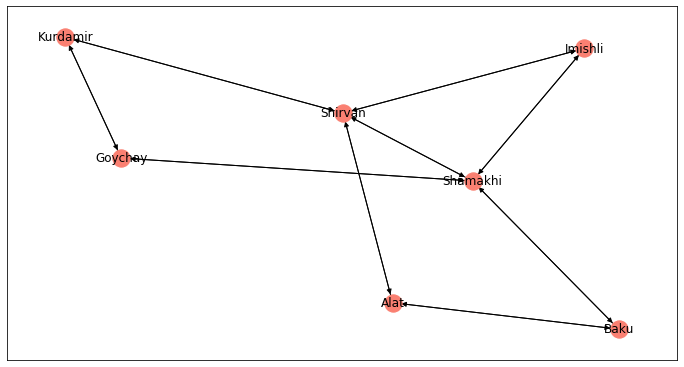

In [0]:
nS='Baku'
nD='Imishli'
attr='Hours'

G=graph(df,'Origin','Destiny')
draw_Graph(G)

###Find shortest path without weights:
find the shortest path

['Baku', 'Shamakhi', 'Imishli']


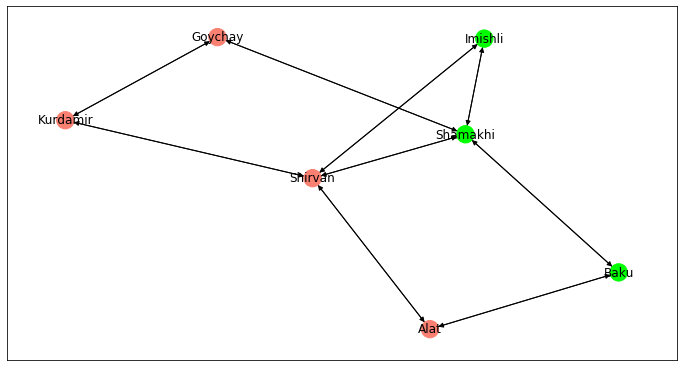

In [0]:
shortestpath=shortest_path(G,nS,nD)
print(shortestpath)
c=color_path(G,shortestpath)
draw_Graph(G,c)

###Find shortest path with weights:
calculate hours of different paths between origin and destiny and find path which hour is less

['Baku', 'Alat', 'Shirvan', 'Imishli']
Hours between Baku and Imishli is: 3.34


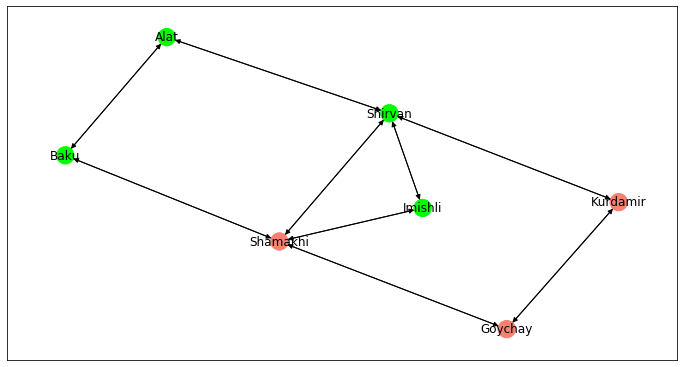

In [0]:
shortpath=short_path(G,nS,nD,attr)
print(shortpath)
evaluation(G,shortpath,nS,nD,attr)
c=color_path(G,shortpath)
draw_Graph(G,c)

###Add path from node1 to node2:

####from Baku to Imishli:

['Baku', 'Imishli']
Hours between Baku and Imishli is: 1.29


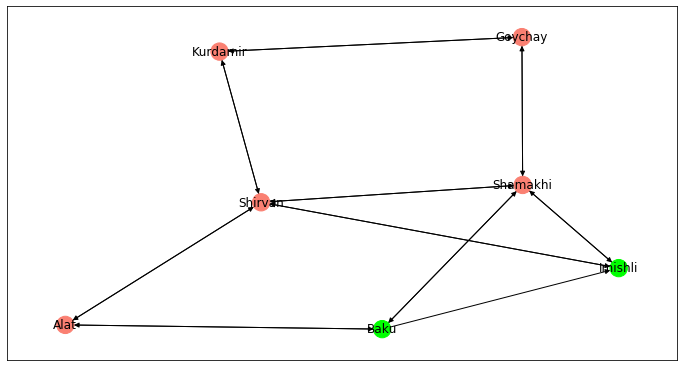

In [0]:
add_path(G,nS,nD,attr,1.29)

find_path(G,nS,nD,attr)

**<font size=4 color='red'> Reason is we adding path from node1 to node2 and our graph is digraph and short path becomes {node1,node2} </font>**

####from Imishli to Baku

['Imishli', 'Shirvan', 'Alat', 'Baku']
Hours between Imishli and Baku is: 3.3


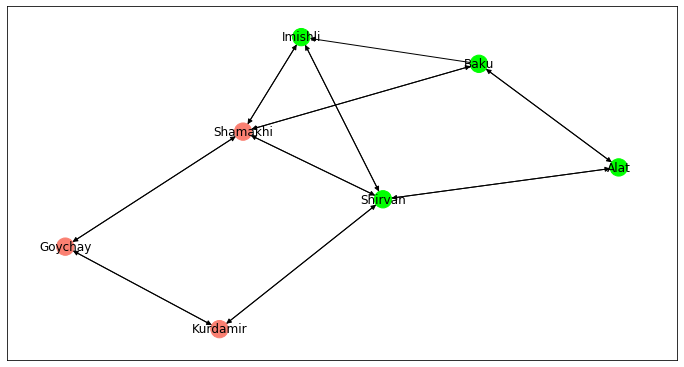

In [0]:
find_path(G,nD,nS,attr)

###Degree Connectivity

In [0]:
degree(G,'Baku')

Inflow Centrality: 2
Outflow Centrality: 3
Degree as sum of them: 5


###Closeness Centrality




In [0]:
lsp=list_shortest(G,'Baku',attr)
# print(lsp)
av=av_len_sp(G,'Baku',attr)
av

2.0833333333333335

###Betweenness Centrality

In [0]:
count=nb_times_node(G,'Shirvan',attr)
count

13

###Network Density

In [0]:
nd=density(G)
nd

0.9047619047619048

###Network Diameter

In [0]:
longest=longest_geodesic(G,attr)
longest

3.3

###Network Average Path Length


In [0]:
lallsp=list_all_shortest(G,attr)
# print(lallsp)
avall=av_len_all_sp(G,attr)
avall

2.011190476190476

#Airports

---



In [0]:
dF=pd.read_csv("airports.csv")
dF

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,AirTime,Origin,Dest,Distance
0,2008,1,3,4,2003.0,1955,2211.0,2225,116.0,IAD,TPA,810
1,2008,1,3,4,754.0,735,1002.0,1000,113.0,IAD,TPA,810
2,2008,1,3,4,628.0,620,804.0,750,76.0,IND,BWI,515
3,2008,1,3,4,926.0,930,1054.0,1100,78.0,IND,BWI,515
4,2008,1,3,4,1829.0,1755,1959.0,1925,77.0,IND,BWI,515
...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2008,1,18,5,1206.0,1200,1713.0,1705,172.0,LAX,HOU,1390
49996,2008,1,18,5,807.0,810,1306.0,1315,170.0,LAX,HOU,1390
49997,2008,1,18,5,1834.0,1815,1933.0,1920,45.0,LAX,LAS,236
49998,2008,1,18,5,725.0,725,821.0,825,42.0,LAX,LAS,236


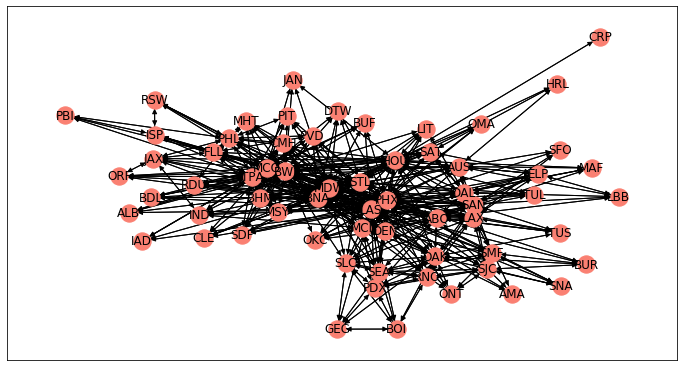

In [0]:
g=graph(dF,'Origin','Dest')
draw_Graph(g)

###Find the shortest path with respect to the distance:

['CRP', 'HOU', 'ABQ', 'SLC', 'BOI']
Distance between CRP and BOI is: 1730


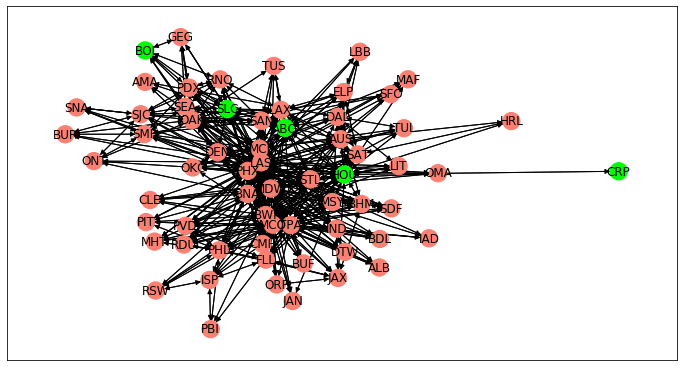

In [0]:
Ns='CRP'
Nd='BOI'
attr1='Distance'
find_path(g,Ns,Nd,attr1)
# find_path(g,Nd,Ns,attr1)

###Find the shortest path with respect to the time:

['CRP', 'HOU', 'DEN', 'SLC', 'BOI']
AirTime between CRP and BOI is: 275.0


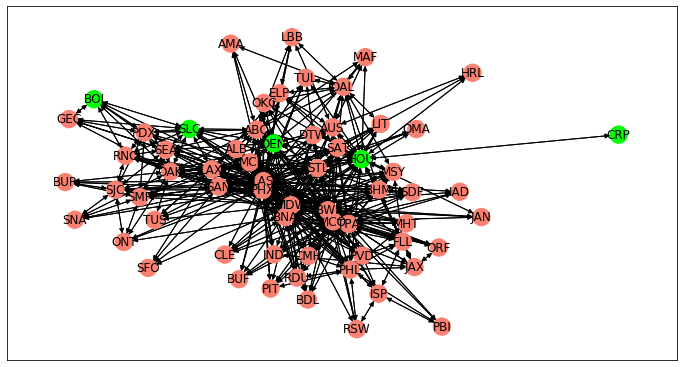

In [0]:
attr2='AirTime'
find_path(g,Ns,Nd,attr2)
# find_path(g,Nd,Ns,attr2)

###Degree Connectivity

In [0]:
degree(g,'SDF')

Inflow Centrality: 8
Outflow Centrality: 8
Degree as sum of them: 16


###Closeness Centrality

In [0]:
lsp=list_shortest(g,'CRP',attr1)
# print(lsp)
av=av_len_sp(g,'CRP',attr1)
av

1225.047619047619

###Betweenness Centrality

In [0]:
count=nb_times_node(g,'BNA',attr1)
count

139

###Network Density

In [0]:
nd=density(g)
nd

0.40773809523809523

###Network Diameter

In [0]:
longest=longest_geodesic(g,attr1)
longest

2727

###Network Average Path Length


In [0]:
lallsp=list_all_shortest(g,attr1)
# print(lallsp)
avall=av_len_all_sp(g,attr1)
avall

1280.4469246031747